In [3]:
import pandas as pd
df = pd.read_csv('/content/Sample - Superstore.csv', encoding='latin1')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df_daily = df[['Order Date', 'Sales']].copy()
df_daily.head()


,Order Date,Sales
0,11/8/2016,261.9600
1,11/8/2016,731.9400
2,6/12/2016,14.6200
3,10/11/2015,957.5775
4,10/11/2015,22.3680


In [7]:
df_daily['Order Date'] = pd.to_datetime(df_daily['Order Date'])
daily_sales = df_daily.groupby('Order Date')['Sales'].sum().reset_index()
daily_sales.head()
daily_sales = daily_sales.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
daily_sales.head()



,ds,y
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,4407.100
4,2014-01-07,87.158


In [11]:
!pip uninstall prophet -y



Found existing installation: prophet 1.1.7
Uninstalling prophet-1.1.7:
  Successfully uninstalled prophet-1.1.7


In [13]:
!pip install cmdstanpy
!pip install prophet --no-cache-dir


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 183.4 MB/s eta 0:00:00


In [1]:
import pandas as pd
df = pd.read_csv('/content/Sample - Superstore.csv', encoding='latin1')
df_daily = df[['Order Date', 'Sales']]
df_daily['Order Date'] = pd.to_datetime(df_daily['Order Date'])
daily_sales = df_daily.groupby('Order Date')['Sales'].sum().reset_index()
daily_sales = daily_sales.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
daily_sales.head()


/tmp/ipython-input-3728056293.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_daily['Order Date'] = pd.to_datetime(df_daily['Order Date'])


,ds,y
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,4407.100
4,2014-01-07,87.158


In [3]:
from prophet import Prophet
model = Prophet()
model.fit(daily_sales)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [4]:
future = model.make_future_dataframe(periods=30)   # Next 30 days
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
1262,2018-01-25,1968.779331,-703.594147,4615.513288
1263,2018-01-26,2265.827233,-429.160828,4960.352130
1264,2018-01-27,1894.228723,-886.904523,4694.686815
1265,2018-01-28,2095.574381,-777.347771,4875.307479
1266,2018-01-29,2314.168560,-377.118498,5031.151517


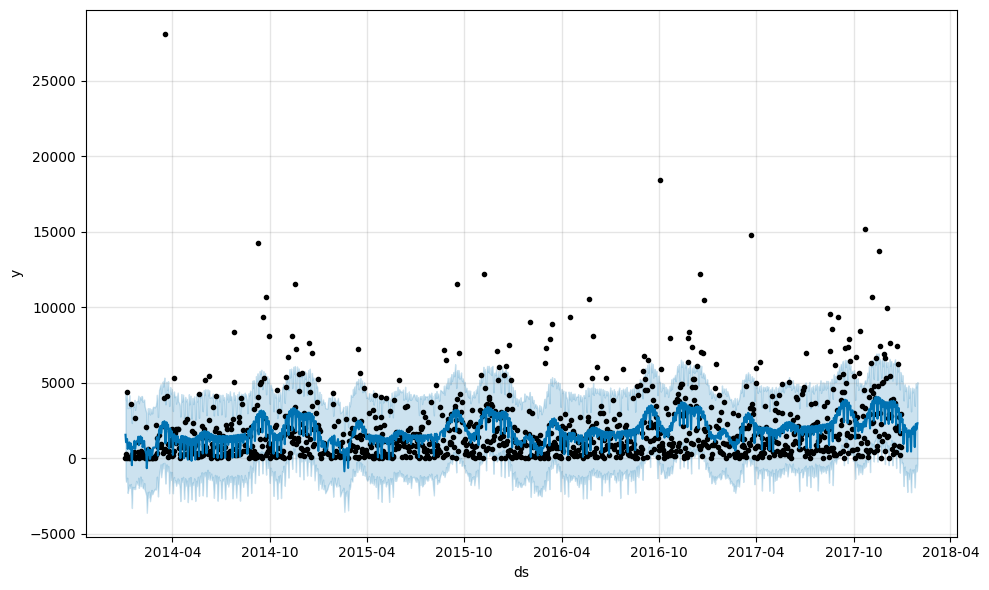

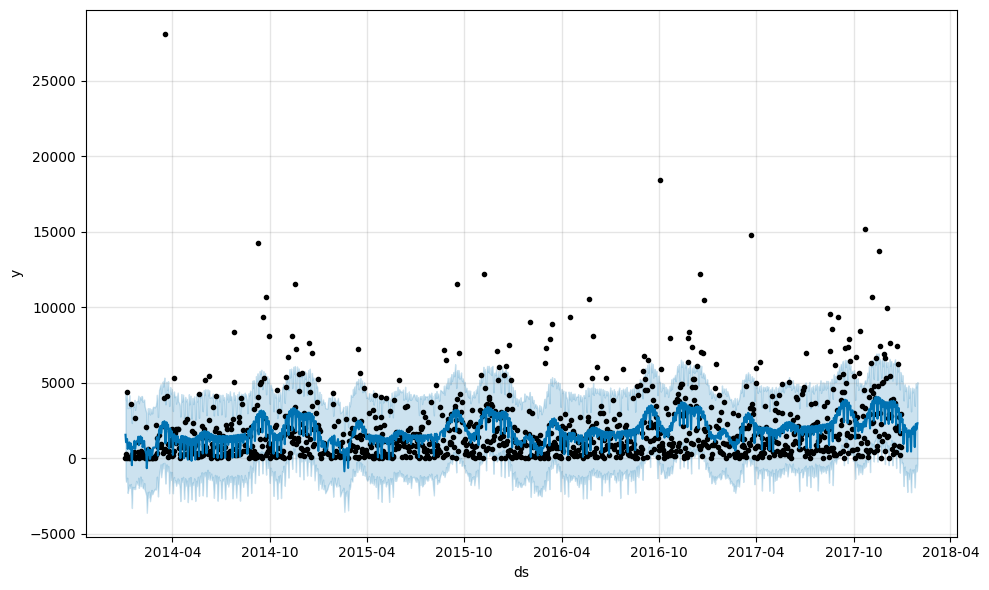

In [5]:
model.plot(forecast)


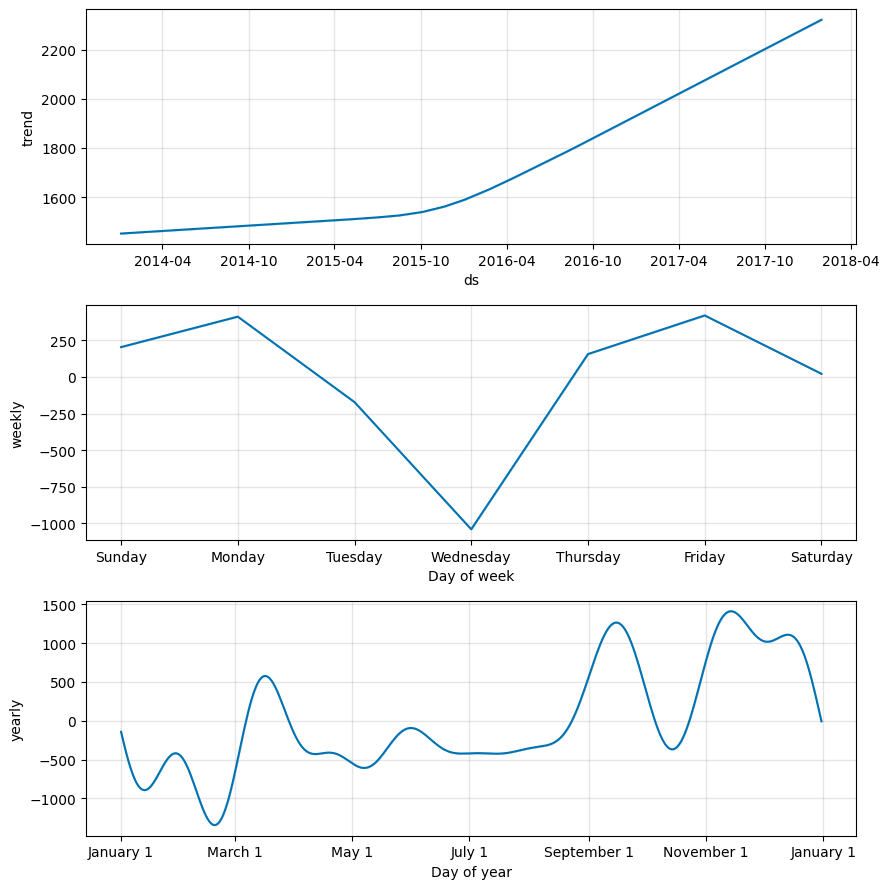

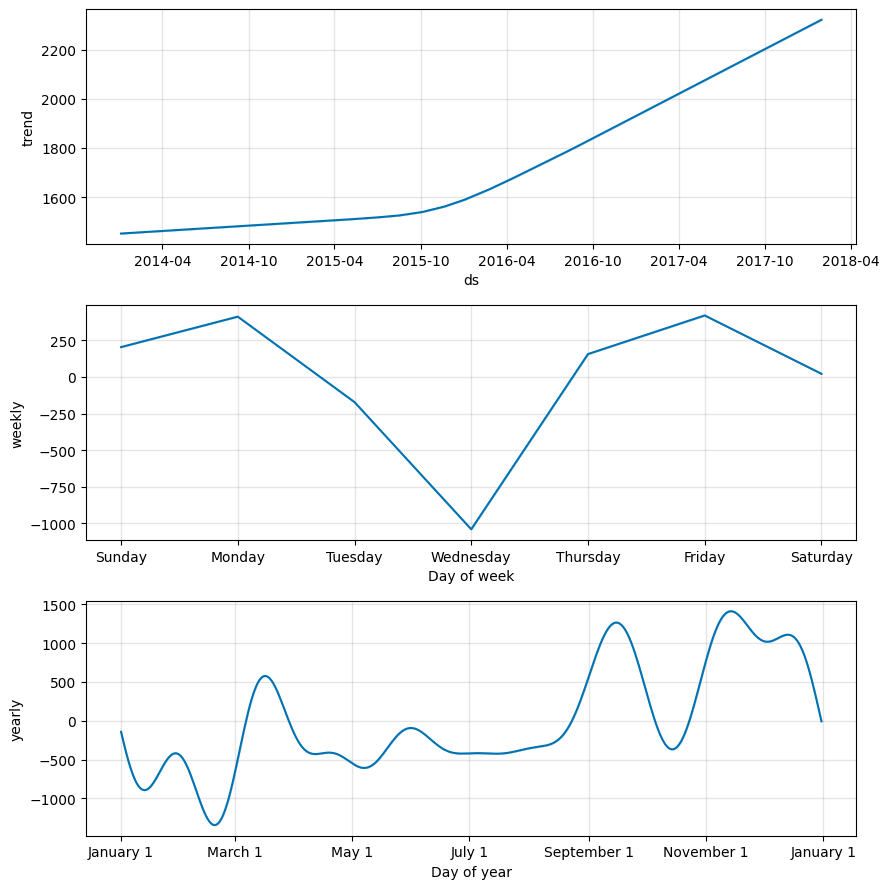

In [6]:

model.plot_components(forecast)

